In [43]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
custo = pd.read_csv(r"C:\Users\HP\Desktop\Iron Hack\Python\Labs\lab-customer-analysis-round-4\files_for_lab\csv_files\marketing_customer_analysis.csv")
custo

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [45]:
cols = []
for i in range(len(custo.columns)): 
    cols.append(custo.columns[i].lower().replace(' ', '_'))
custo.columns = cols

# Check the data types of the columns

In [46]:
custo.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

# Get the numeric data into dataframe called numerical

In [47]:
numerical = custo.select_dtypes(include=['float64', 'int64'])

# Categorical columns in a dataframe called categoricals

In [48]:
categoricals = custo.select_dtypes(include=['object'])

# Use seaborn library to construct distribution plots for the numerical variables

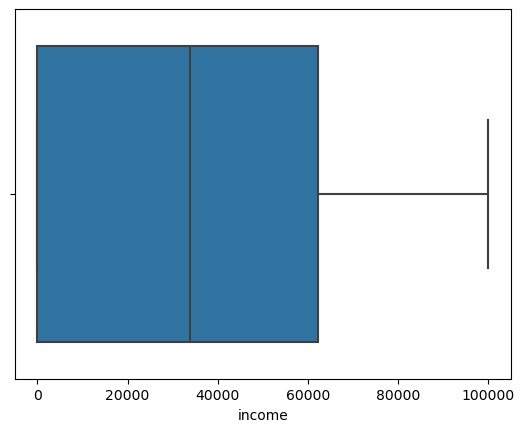

In [49]:
sns.boxplot(x=custo['income'], data=custo)
plt.show()

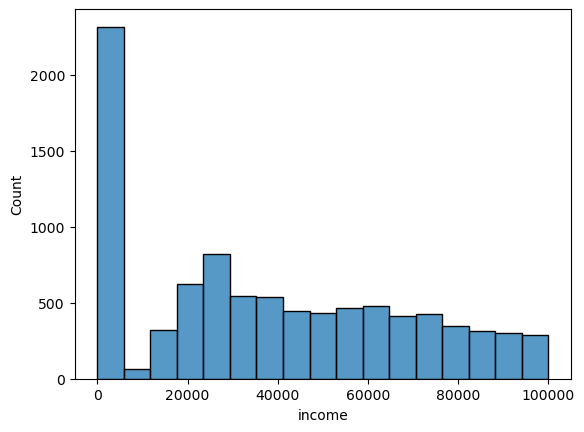

In [50]:
sns.histplot(custo['income'])
plt.show()

# Do the distributions for different numerical variables look like a normal distribution

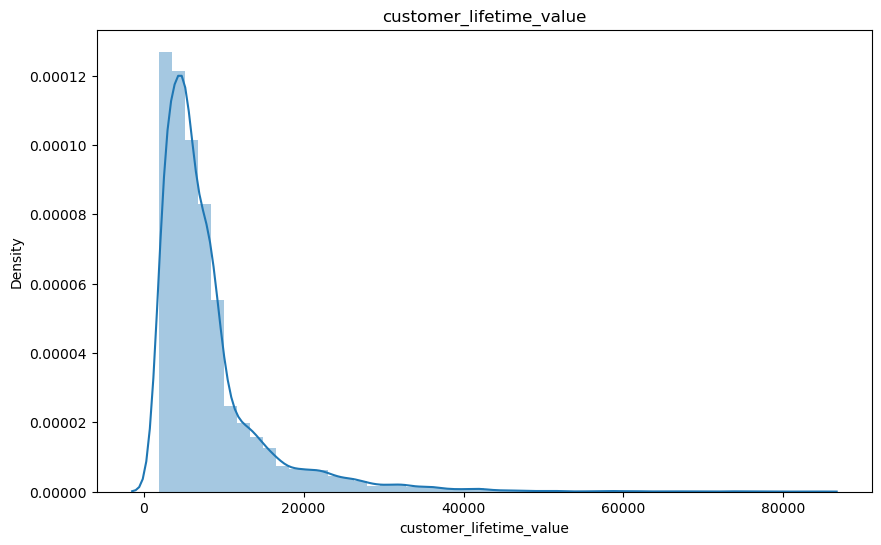

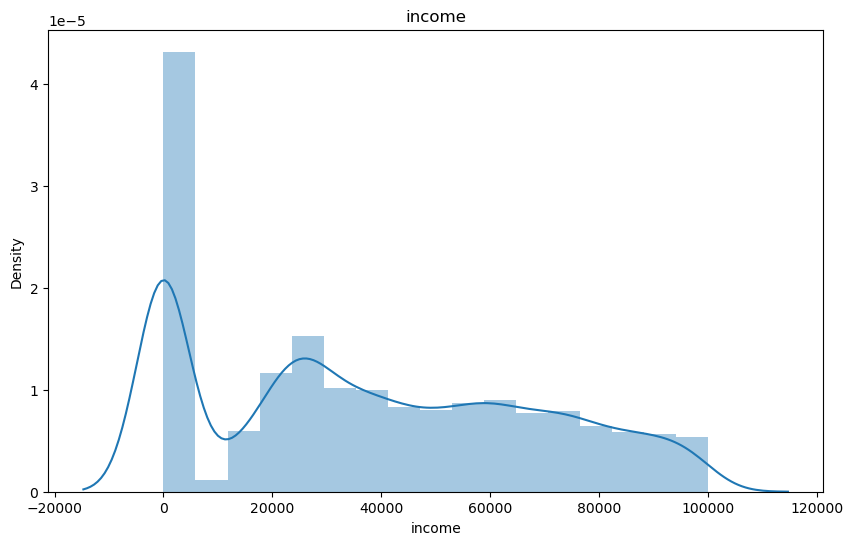

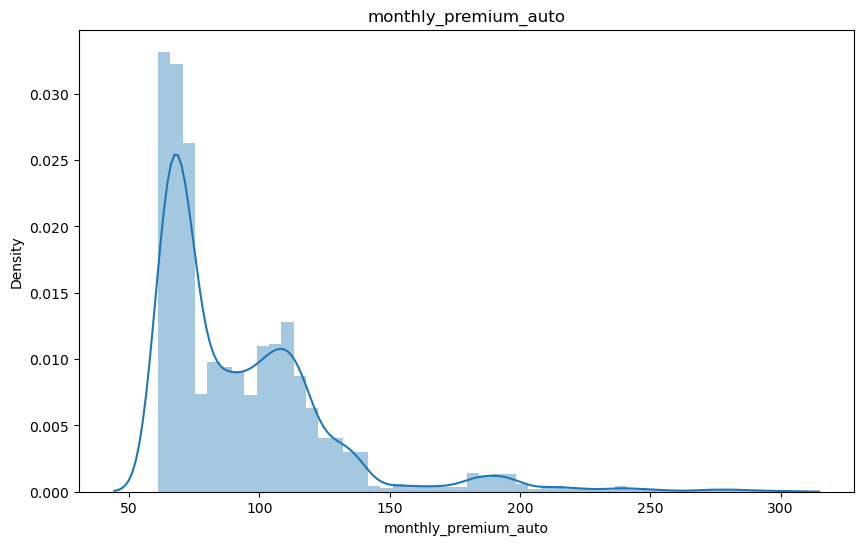

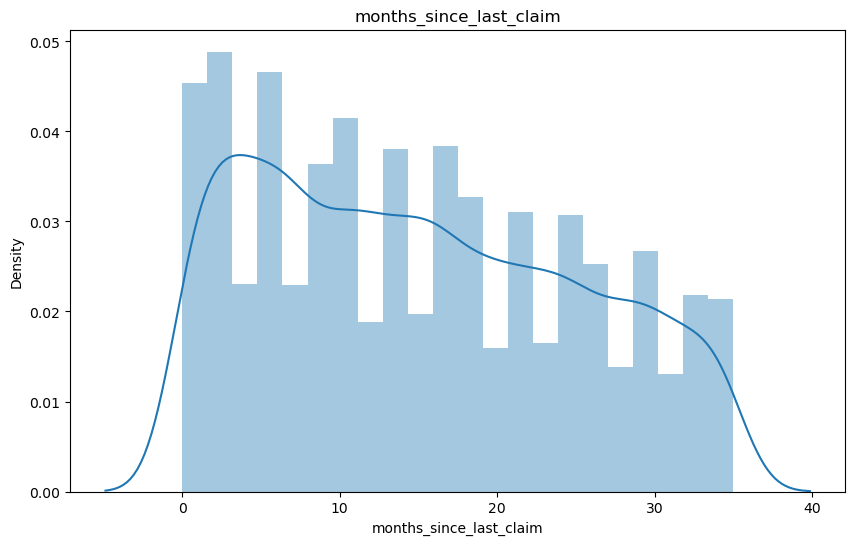

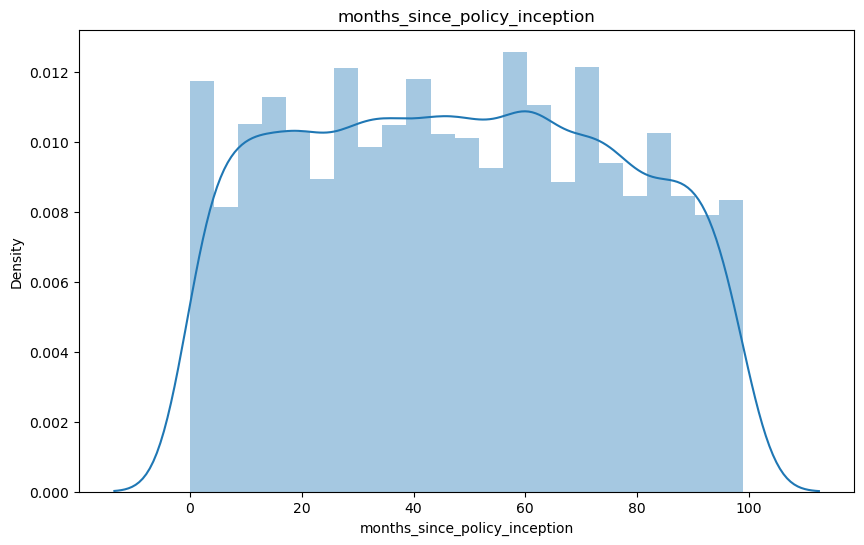

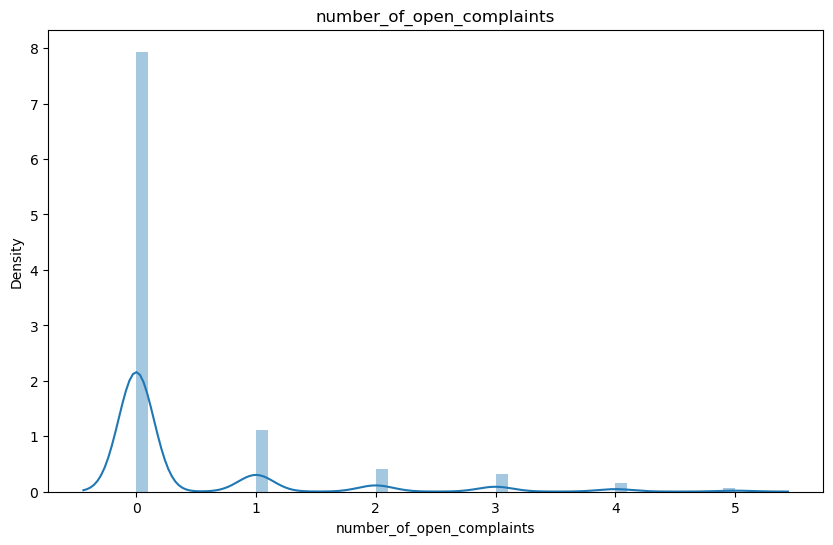

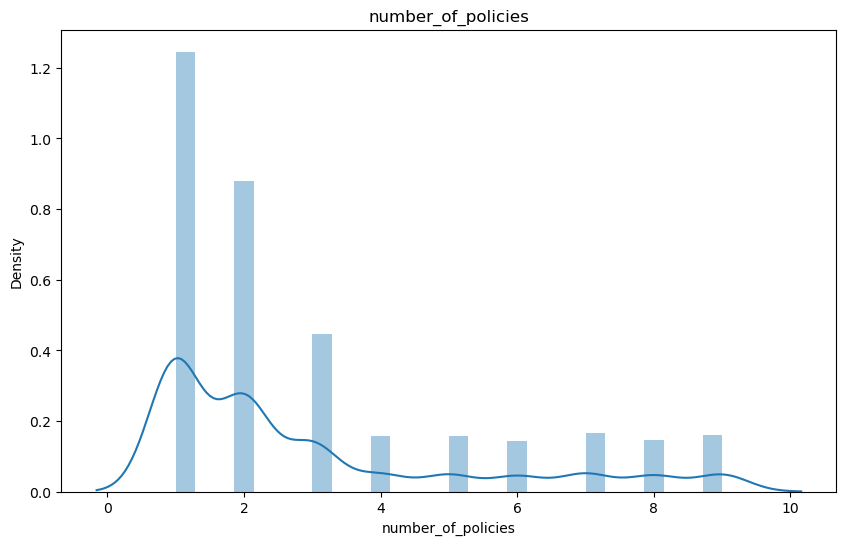

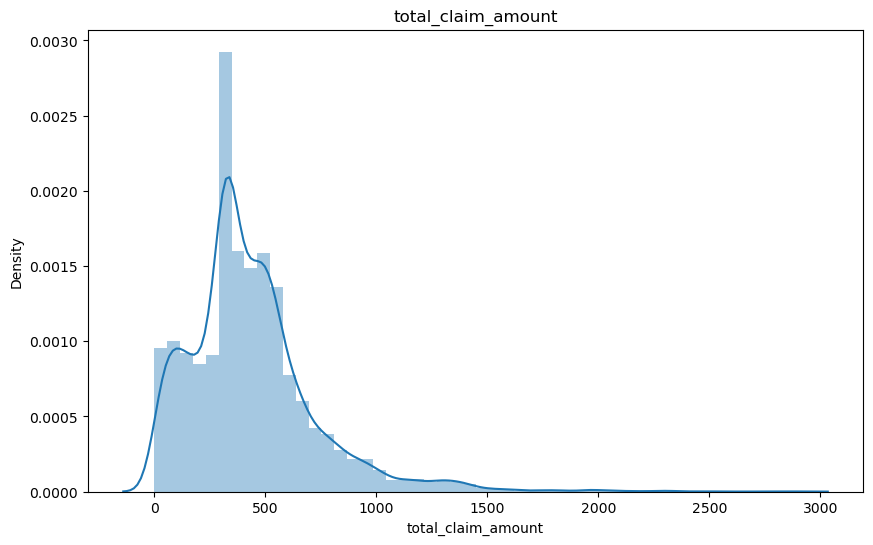

In [51]:
for column in numerical.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(numerical[column]).set_title(column)
    plt.show()

# For the numerical variables, check the multicollinearity between the features

In [52]:
correlations = numerical.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [53]:
# There is no correlations between them

# Customer Analysis Round 5

# X-y split

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Y = custo['customer_lifetime_value']
X = custo['customer_lifetime_value']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     customer_lifetime_value   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 4.286e+33
Date:                     Sun, 30 Jun 2024   Prob (F-statistic):               0.00
Time:                             15:16:57   Log-Likelihood:             2.1836e+05
No. Observations:                     9134   AIC:                        -4.367e+05
Df Residuals:                         9132   BIC:                        -4.367e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.446e-12   1.61e-13     15.182      0.000    2.13e-12    2.76e-12
customer_lifetime_value     1.0000   1.53e-17   6.55e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     6415.736   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112168.384
Skew:                           3.208   Prob(JB):                         0.00
Kurtosis:                      18.924   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Customer Analysis Round 6

# One Hot/Label Encoding (categorical)

In [55]:
custo = custo.drop(['customer','state'], axis = 1)
custo

,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [56]:
custo_dummies = pd.get_dummies(custo, drop_first=True)
custo_dummies

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response_Yes,coverage_Extended,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,False,False,...,False,False,False,False,False,False,False,True,True,False
1,6979.535903,0,94,13,42,0,8,1131.464935,False,True,...,False,False,False,False,False,False,False,False,True,False
2,12887.431650,48767,108,18,38,0,2,566.472247,False,False,...,False,False,False,False,False,False,False,True,True,False
3,7645.861827,0,106,18,65,0,7,529.881344,False,False,...,False,True,False,False,False,True,False,False,True,False
4,2813.692575,43836,73,12,44,0,1,138.130879,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,False,False,...,False,False,True,False,False,False,False,False,True,False
9130,3096.511217,21604,79,14,28,0,1,379.200000,True,True,...,True,False,False,False,False,False,False,False,True,False
9131,8163.890428,0,85,9,37,3,2,790.784983,False,True,...,True,False,False,False,False,False,False,False,True,False
9132,7524.442436,21941,96,34,3,0,3,691.200000,False,True,...,True,False,False,False,False,False,False,False,False,False


In [57]:
concatenated = pd.concat([custo, custo_dummies], axis=0)
concatenated

,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,NaN,NaN,NaN,NaN,NaN,NaN,71941,NaN,NaN,...,False,False,True,False,False,False,False,False,True,False
9130,3096.511217,NaN,NaN,NaN,NaN,NaN,NaN,21604,NaN,NaN,...,True,False,False,False,False,False,False,False,True,False
9131,8163.890428,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,True,False,False,False,False,False,False,False,True,False
9132,7524.442436,NaN,NaN,NaN,NaN,NaN,NaN,21941,NaN,NaN,...,True,False,False,False,False,False,False,False,False,False


# Linear Regression

Train-test split

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_test)

In [69]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

R²: 1.0
MSE: 4.033360058394255e-23
RMSE: 6.350874001579826e-12
MAE: 4.0797831572961325e-12


 # Lab | Customer Analysis Round 7


In [77]:
custo.isna()

,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
custo.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
response_No                         bool
response_Yes                        bool
dtype: object

In [93]:
custo.isna()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response_No,response_Yes
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False


In [95]:
for column in custo.columns:
    if custo[column].dtype == object:
        print(f"Column {column} has non-numeric values: {custo[column].unique()}")
        if sorted(custo[column].unique()) == ['No', 'Yes']:
            custo[column] = LabelEncoder().fit_transform(custo[column])
        else:
            custo = pd.get_dummies(custo, columns=[column])
custo


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response_No,response_Yes
0,2763.519279,56274,69,32,5,0,1,384.811147,True,False
1,6979.535903,0,94,13,42,0,8,1131.464935,True,False
2,12887.431650,48767,108,18,38,0,2,566.472247,True,False
3,7645.861827,0,106,18,65,0,7,529.881344,True,False
4,2813.692575,43836,73,12,44,0,1,138.130879,True,False
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,True,False
9130,3096.511217,21604,79,14,28,0,1,379.200000,False,True
9131,8163.890428,0,85,9,37,3,2,790.784983,True,False
9132,7524.442436,21941,96,34,3,0,3,691.200000,True,False


In [96]:
custo.fillna(0, inplace=True)

In [97]:
X = custo.drop(columns='customer_lifetime_value')
y = custo['customer_lifetime_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R²: {r2}')
print(f'MSE: {mse}')

R²: 0.1532896153191442
MSE: 43636189.55793003
